# 1. INTRODUCTION

**1.1 Indentity**
- Name : Daniel Satria


**1.2 Dataset Explanation**
- The dataset consists of the medical information from people that likely have heart failure..


**1.3 Objective**
- Making machine learning model with Random Forest & Boosting.
- Makng evaluation of the model.
- Determining the hyper-parameter of the model.
- Predict the class from data inference.
- Drawing conclusion from overall project.

**1.4 Notebook Disclaimer**
- I will write the title/explanation first, then later the code.
- The title means to explain what I do or try  to do with the code or to explain the output of the code itself.

___

# 2. IMPORT LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

____

# 3. DATA LOADING

3.1 Loading dataset
- Here I load the dataset that will be used for this GC3.
- I also show the head and the tail of the dataset as shown below.


In [2]:
df = pd.read_csv('h8dsft_P1G3_daniel_satria.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [3]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


____

# 4. Exploratory Data Analysis / EDA

4.1 Dataset shape
- There are 299 rows and 13 columns in our dataset.

In [4]:
df.shape

(299, 13)

4.2 Checking missing value
- There is no missing value in our dataset.

In [5]:
np.isnan(df).any().sum()

0

4.3 Taking data inference
- Here I take one row as our data inference.
- Before taking the data, we assign the random seed so we can call the exact same data later.
- We got the data from index 138 as our data inference.

In [6]:
# assign random seed, so the data inf won't be generated all over again whenever we call it
np.random.seed(9834)

# taking the 1 data inference from our dataset
data_inf = df.sample(1)
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
138,50.0,0,250,0,25,0,262000.0,1.0,136,1,1,120,0


4.4 Dropping data inference from original dataset
- Dropping the data inference from the original dataset, so later the model can predict the brand new data.
- Now, our total dataset have 298 rows.

In [7]:
df.drop(index=data_inf.index, inplace=True)
df.shape

(298, 13)

4.5 Spliting data train and test
- To prevent the leakage of the data, I decide to split the data early in this step.
- So, the model will do optimized work and we also can understand how much the precision of our model.
- Our data train now consist of 238 rows.

In [8]:
from sklearn.model_selection import train_test_split

#splitting the data train and test
data_train, data_test  = train_test_split(df, train_size=0.8, random_state=3397, stratify=df['DEATH_EVENT'])
print('The new shape of our data train is ', data_train.shape)
data_train.head()

The new shape of our data train is  (238, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
144,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205,0
58,50.0,0,318,0,40,1,216000.0,2.3,131,0,0,60,1
289,64.0,0,1610,0,60,0,242000.0,1.0,137,1,0,113,0
97,64.0,1,62,0,60,0,309000.0,1.5,135,0,0,174,0
50,65.0,0,326,0,38,0,294000.0,1.7,139,0,0,220,0


4.6 Checking duplicated data
- We don't have any dulicated data in the dataset.

In [9]:
data_train.duplicated().sum()

0

4.7 Insight from describe
- We can conclude there are 4 columns category in our dataset : anaemia, diabetes, high_blood_pressure, sex, smoking.

In [10]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,238.0,61.376752,11.853239,40.0,52.00,60.000,70.00,95.0
anaemia,238.0,0.449580,0.498500,0.0,0.00,0.000,1.00,1.0
creatinine_phosphokinase,238.0,513.995798,850.526496,23.0,111.25,227.500,582.00,7861.0
diabetes,238.0,0.403361,0.491606,0.0,0.00,0.000,1.00,1.0
ejection_fraction,238.0,37.697479,11.275645,15.0,30.00,38.000,45.00,70.0
high_blood_pressure,238.0,0.373950,0.484870,0.0,0.00,0.000,1.00,1.0
platelets,238.0,263347.137101,99618.119399,25100.0,211250.00,263179.015,302000.00,850000.0
serum_creatinine,238.0,1.380504,0.933643,0.5,0.90,1.100,1.50,9.0
serum_sodium,238.0,136.663866,4.267980,113.0,134.00,137.000,139.00,148.0
sex,238.0,0.651261,0.477576,0.0,0.00,1.000,1.00,1.0


4.8 Check unique values in category columns
- There are two values in every category columns.
- And, all of them have been encoded in ordinal way, 0 and 1.

In [11]:
print('- anaemia unique variables :', data_train['anaemia'].unique())
print('='*110)
print('- diabetes unique variables :', data_train['diabetes'].unique())
print('='*110)
print('- high_blood_pressure unique variables :', data_train['high_blood_pressure'].unique())
print('='*110)
print('- sex unique variables :', data_train['sex'].unique())
print('='*110)
print('- smoking unique variables :', data_train['smoking'].unique())

- anaemia unique variables : [0 1]
- diabetes unique variables : [1 0]
- high_blood_pressure unique variables : [0 1]
- sex unique variables : [1 0]
- smoking unique variables : [0 1]


4.9 Insight from age and category columns
- The distribution of the age is a bit right-skew.
- This dataset have majority of Age 60-70.
- In every column, class 0 has higher total amount than 1.
- It seems we have the imbalance class of the target.
- Total people who don't have anaemia, diabetes, high blood pressure and smoking are higher than the people who have it. 
- The people that sex class 1 are higher than 0.

<AxesSubplot:xlabel='smoking', ylabel='count'>

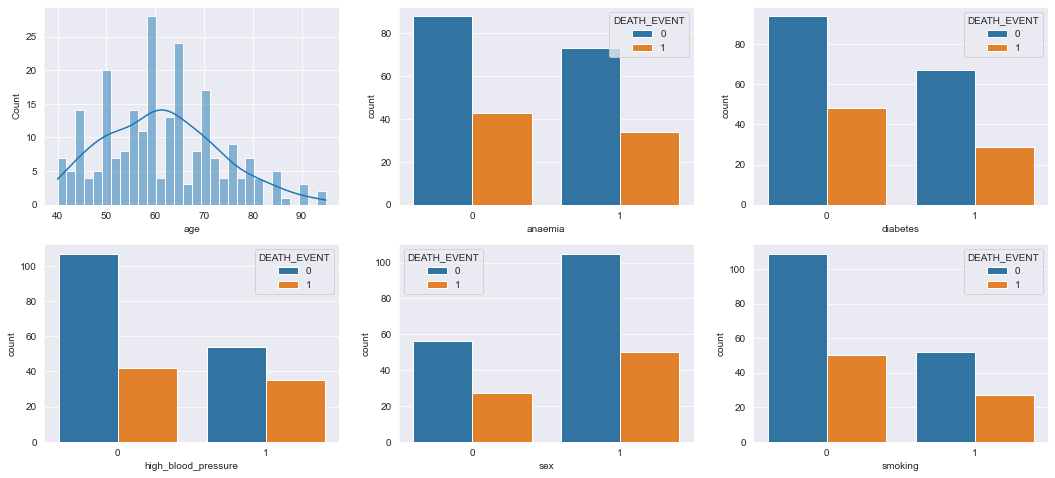

In [12]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(2, 3, figsize=(18, 8))
sns.histplot(data=data_train, x='age', kde=True, bins=30, ax=ax[0, 0])
sns.countplot(data=data_train, x='anaemia', hue='DEATH_EVENT', ax=ax[0, 1])
sns.countplot(data=data_train, x='diabetes', hue='DEATH_EVENT', ax=ax[0, 2])
sns.countplot(data=data_train, x='high_blood_pressure', hue='DEATH_EVENT', ax=ax[1, 0])
sns.countplot(data=data_train, x='sex', hue='DEATH_EVENT', ax=ax[1, 1])
sns.countplot(data=data_train, x='smoking', hue='DEATH_EVENT', ax=ax[1, 2])

4.10 Insight creatinine_phosphokinase, platelets, ejection_fraction, serum_creatinine & target.
- Some of the people that have extrene high amount of creatinine_phosphokinase, creatinine_phosphokinase, serum_sodium is likely to have class 1 of the target (DEATH_EVENT).
- It seems there columns have correlation with the target.

<AxesSubplot:xlabel='platelets', ylabel='creatinine_phosphokinase'>

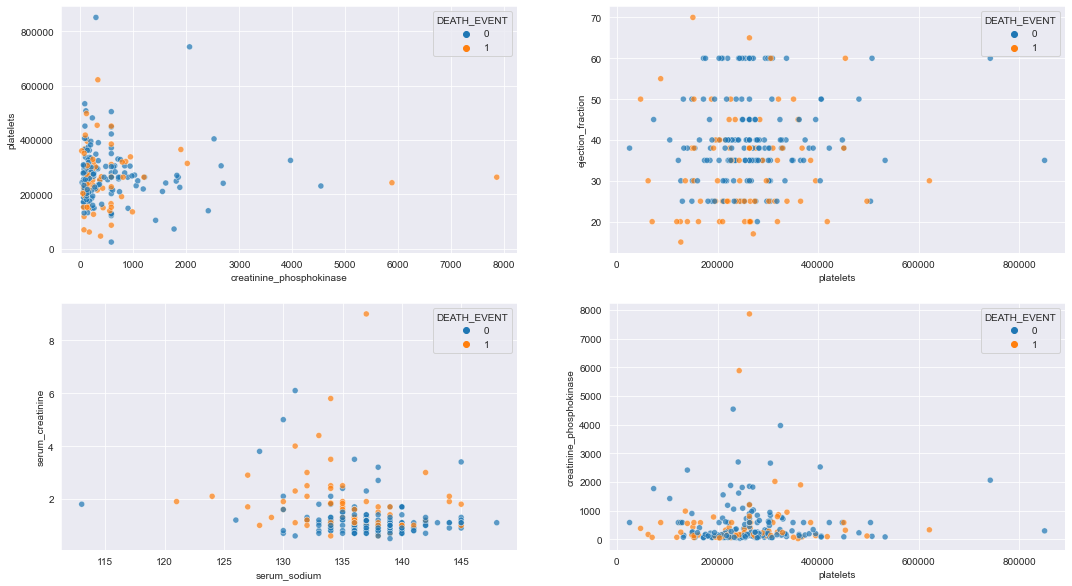

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10))
sns.scatterplot(data=data_train, x='creatinine_phosphokinase', y='platelets', hue='DEATH_EVENT', ax=ax[0,0], alpha=0.7)
sns.scatterplot(data=data_train, x='platelets', y='ejection_fraction', hue='DEATH_EVENT', ax=ax[0,1], alpha=0.7)
sns.scatterplot(data=data_train, x='serum_sodium', y='serum_creatinine', hue='DEATH_EVENT', ax=ax[1,0], alpha=0.7)
sns.scatterplot(data=data_train, x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', ax=ax[1,1], alpha=0.7)

4.11 Data distribution of creatinine_phosphokinase
- If we plot it using histogram and boxplot, it seems there are some outliers there.
- However, since this is a medical number we need to research further.
- Based on medical reference, dangeous amount of creatinine_phosphokinase are 5000 micrograms per liter (mcg/L).
- Since this a medial report, I won't handle the outliers and leave it as it is.

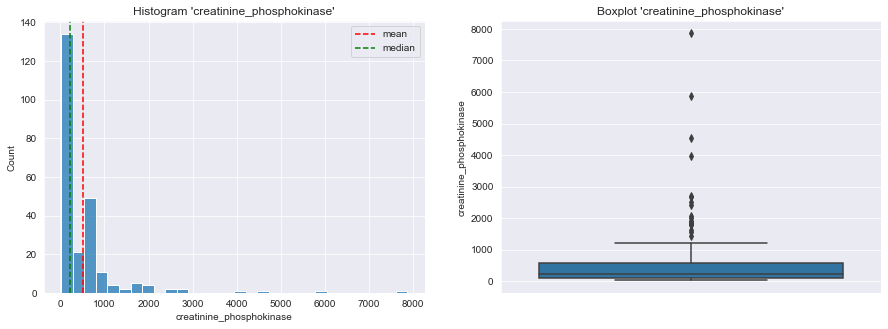

creatinine_phosphokinase Kurtosis: 32.180593965802444
creatinine_phosphokinase Skewness: 4.915596232282637
Columns 'creatinine_phosphokinase' is right skewed


In [14]:
#making function for plotting the distribution of the data
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' is right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' is left skewed".format(col))

#plotting the distribution data of limit_balance
plot_dist(data_train, 'creatinine_phosphokinase')

4.12 Insight from platelets
- It seems that the data have outlliers if we see the boxplot.
- Yet, from medical report that have 500000 platelets is still OK. Even for sume of people it can be 6000000
- However, since it's the medical number I won't handle the outliers.

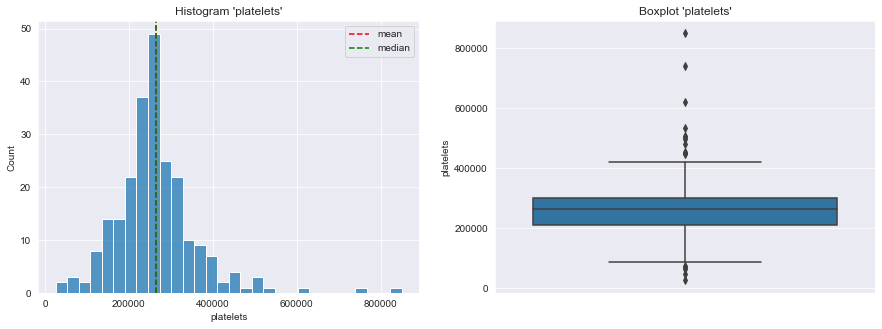

platelets Kurtosis: 7.170961115207354
platelets Skewness: 1.6607869759548701
Columns 'platelets' is right skewed


In [15]:
plot_dist(data_train, 'platelets')

4.13 Insight from correlation Heatmap Matrix
- Here I try to see correlation between the features and target using HeatMap Correlation matrix.
- It seems the all features have correlation.
- The highest is time, and following by serum creatinine, ejection fraction.
- We can't rely 100% with this matrix for the category, thus we need see it further with the KBest with later.

<AxesSubplot:>

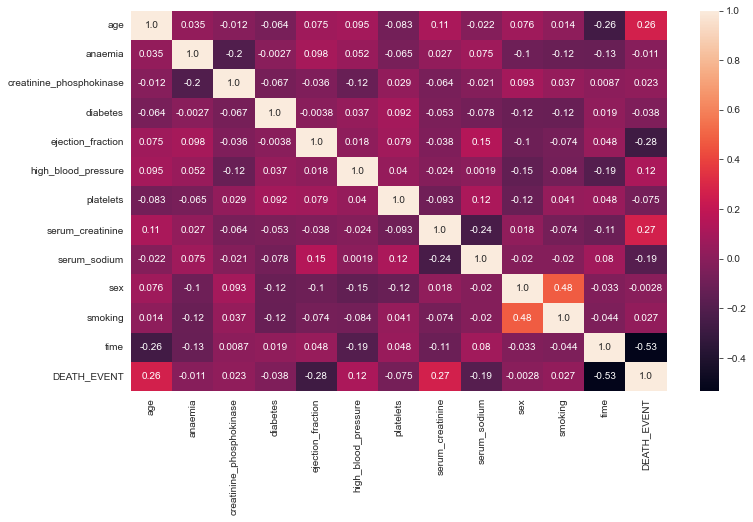

In [16]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(data_train.corr(), annot=True, fmt='.2')

4.14 Checking the target class distribution.
- Here, the target of our dataset is column DEATH_EVENT.
- The class is imbalance, but it's still moderate imbalance because the difference between class 0 than class 1 is 50%.
- Thus, I don't handle the imbalance dataa and proceed as it is.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

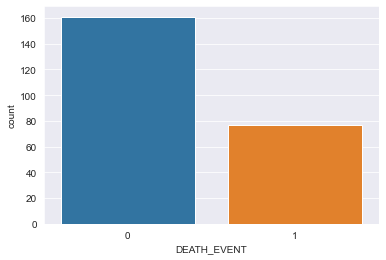

In [17]:
sns.countplot(data=data_train, x='DEATH_EVENT')

____

# 5. FEATURE ENGINEER & SELECTION

5.1 Splitting data train & dev
- Here I split the data train and dev.
- Now, the data train shape is 190 rows.

In [18]:
#splitting the data train and test
train, dev  = train_test_split(data_train, train_size=0.8, random_state=31397, stratify=data_train['DEATH_EVENT'])
print('The new shape of our data train is ', train.shape)
train.head()

The new shape of our data train is  (190, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.0,1.2,145,1,0,147,0
31,65.0,1,335,0,35,1,235000.0,0.8,136,0,0,120,0
53,45.0,0,582,0,38,1,422000.0,0.8,137,0,0,245,0
260,59.0,1,129,0,45,1,362000.0,1.1,139,1,1,121,0
125,68.0,1,577,0,25,1,166000.0,1.0,138,1,0,43,1


5.2 Feature Selection with K-Best
- Here I use KBest to calculate the number of correlatiion between features and target.
- The features that show high correlation are time : 63.0, ejection_fraction : 21.0, serum_creatinine : 19.0, serum_sodium : 5.0, age : 4.0.
- I will use those features, and exclude others.

In [19]:
from sklearn.feature_selection import SelectKBest

# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
K_best = SelectKBest(k=4)
train_K_best = K_best.fit(train.drop(columns='DEATH_EVENT', axis=1), train['DEATH_EVENT'])
K_best_scores = np.round_(train_K_best.scores_)

# assign to data frame and make the descending index
df_K_best_Scores = pd.Series(K_best_scores)
df_K_best_Scores.index = train.drop(columns='DEATH_EVENT', axis=1).columns
df_K_best_Scores.sort_values(ascending=False)

time                        63.0
ejection_fraction           21.0
serum_creatinine            19.0
serum_sodium                 5.0
age                          4.0
platelets                    1.0
anaemia                      0.0
creatinine_phosphokinase     0.0
diabetes                     0.0
high_blood_pressure          0.0
sex                          0.0
smoking                      0.0
dtype: float64

**PRE-PROCESS TRAIN**

5.3 Selecting the column based on K-Best

In [20]:
X_train = train[['time', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'age']]
y_train = train['DEATH_EVENT']

**PRE-PROCESS DEV**

In [21]:
X_dev = dev[['time', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'age']]
y_dev = dev['DEATH_EVENT']

5.4 Note for the scaling and encoding
- Since in this project I will use Random Forest and XGBoost, I don't need to scaling the number columns.
- Also, since the selected features don't have category columns (I exclude them since they don't have strong correlation, and also to avoid high variance), I don't use encoding method.

____

# **RANDOM FOREST**

# 6. MODEL DEFINITION OF RANDOM FOREST

6.1 Defining model
- Here I set the hyper-parameter to max_depth=15, so all the leaves won't be pure and the model won't be over-fitting.

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(max_depth=15, random_state=975)
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=975)

___

# 7. MODEL EVALUATION OF RANDOM FOREST

7.1 Predict the data using Random Forest model.
- Here I predict the data train & dev with random forest.
- I also use predict proba to see the ROC AUC score.
- Since the target class is imbalance I won't use accuracy score.

In [23]:
y_train_predict_random_forest = model_random_forest.predict(X_train)
y_train_predict_proba_random_forest = model_random_forest.predict_proba(X_train)

y_dev_predict_random_forest = model_random_forest.predict(X_dev)
y_dev_predict_proba_random_forest = model_random_forest.predict_proba(X_dev)

7.2 Score Evaluation
- Train's ROC AUC score is 1, which means the model can distinguish perfectly the class 0 & 1.
- With Dev's ROC AUC score is 0.88, it means our model is under-fit.
- If we see the F1-Score, model also can predict all the data for train.
- But, for dev have 0.86 for class 0, and 0.73 for class 1.
- The F1 score also indicate that our model is over-fit.
- Our model can predict the class 0 better than 1 in dev, because imbalance class target in data train.

In [24]:
from sklearn.metrics import classification_report, roc_auc_score

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_random_forest[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_random_forest[:, 1]))

print('RADOM FORESTCLASSIFIER \n', classification_report(y_train, y_train_predict_random_forest))
print('RADOM FORESTCLASSIFIER \n', classification_report(y_dev, y_dev_predict_random_forest))

ROC AUC score train :  1.0
ROC AUC score dev :  0.88671875
RADOM FORESTCLASSIFIER 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        61

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190

RADOM FORESTCLASSIFIER 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.71      0.75      0.73        16

    accuracy                           0.81        48
   macro avg       0.79      0.80      0.79        48
weighted avg       0.82      0.81      0.81        48



____

# 8. MODEL IMPROVEMENT OF RANDOM FOREST

8.1 Defining hyper-parameter for improved model
- Here I set the max_depth to 30, to explore whether the model can be better to distinguish the class for dev.
- To balance it, I set the min_samples_splits to 3, reduce the over-fitting of the model.
- Then fit the model with data train once again.

In [25]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest_improve = RandomForestClassifier(max_depth=30, min_samples_split=3, random_state=975)
model_random_forest_improve.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=3, random_state=975)

8.2 Predict the data train and dev using improved model.

In [26]:
y_train_predict_random_forest_improve = model_random_forest_improve.predict(X_train)
y_train_predict_proba_random_forest_improve = model_random_forest_improve.predict_proba(X_train)

y_dev_predict_random_forest_improve = model_random_forest_improve.predict(X_dev)
y_dev_predict_proba_random_forest_improve = model_random_forest_improve.predict_proba(X_dev)

8.3 Evaluation Score of Improved Model
- The ROC AUC train is lower, but dev is higher. It means the model works better than before.
- It's still over-fit but the gap is lower.
- It's also the same with F1-score. The score for dev is getting better than before.
- Even, the model is still over-fit, but we can say we're success to make the model work better by set change the hyper-parameter.

In [27]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_random_forest_improve[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_random_forest_improve[:, 1]))

print('RANDOM FOREST CLASSIFIER \n', classification_report(y_train, y_train_predict_random_forest_improve))
print('RANDOM FOREST CLASSIFIER \n', classification_report(y_dev, y_dev_predict_random_forest_improve))

ROC AUC score train :  0.9998729190494344
ROC AUC score dev :  0.9013671875
RANDOM FOREST CLASSIFIER 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       129
           1       0.98      1.00      0.99        61

    accuracy                           0.99       190
   macro avg       0.99      1.00      0.99       190
weighted avg       0.99      0.99      0.99       190

RANDOM FOREST CLASSIFIER 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.75      0.75      0.75        16

    accuracy                           0.83        48
   macro avg       0.81      0.81      0.81        48
weighted avg       0.83      0.83      0.83        48



_____

# **ADABOOST**

# 9. MODEL DEFINITON OF ADABOOST

9.1 Defining the model
- Here I define the model with hyper-parameter of estimator 200, just to explore how the model work with the data.

In [28]:
from xgboost import XGBClassifier

model_xgboost = XGBClassifier(n_estimators=200, random_state=42)
model_xgboost.fit(X_train, y_train)

[21:32:42] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

____

# 10. MODEL EVALUATION OF XGBOOST

10.1 Predicting the data train and dev using XGBoost model.

In [29]:
y_train_predict_xgboost = model_xgboost.predict(X_train)
y_train_predict_proba_xgboost = model_xgboost.predict_proba(X_train)

y_dev_predict_xgboost = model_xgboost.predict(X_dev)
y_dev_predict_proba_xgboost = model_xgboost.predict_proba(X_dev)

10.2 Evaluation score
- ROC AUC train is 1, which means the model can distinguish perfectly the class 0 & 1 in data train. This is the same with Random Forest before improvement.
- ROC AUC dev is a bit worse than Random Forest. This also means the model is stiill over-fit.
- The F1 score dev is worse than F1 score from Random Forest, both before and after improvement.
- Perhaps we can set the hyper-parameter to improve our XGBoost model.

In [30]:
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_xgboost[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_xgboost[:, 1]))

print('XG BOOST \n', classification_report(y_train, y_train_predict_xgboost))
print('AXG BOOST \n', classification_report(y_dev, y_dev_predict_xgboost))

ROC AUC score train :  1.0
ROC AUC score dev :  0.85546875
XG BOOST 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        61

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190

AXG BOOST 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.67      0.75      0.71        16

    accuracy                           0.79        48
   macro avg       0.77      0.78      0.77        48
weighted avg       0.80      0.79      0.79        48



_____

# 11. MODEL IMPROVEMENT OF XGBOOST

11.1 Defining the model improvement
- Here I set the subsample to 0.1 means that XGBoost would randomly sample half of the training data prior to growing trees and this will prevent overfitting.
- eta is setted to 0.6 to reduce the over-fitting as well, since the default number is 0.3. With this eta will shrink the feature weights to make the boosting process more conservative.

In [31]:
from xgboost import XGBClassifier

model_xgboost_improve = XGBClassifier(eta=0.6, subsample=0.1, max_depth=3, n_estimators=100, random_state=42)
model_xgboost_improve.fit(X_train, y_train)

[21:32:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.6, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.600000024,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.1,
              tree_method='exact', validate_parameters=1, verbosity=None)

11.2 Predict the data train & dev using the improved model of XGBoost

In [32]:
y_train_predict_xgboost_improve = model_xgboost_improve.predict(X_train)
y_train_predict_proba_xgboost_improve = model_xgboost_improve.predict_proba(X_train)

y_dev_predict_xgboost_imppove = model_xgboost_improve.predict(X_dev)
y_dev_predict_proba_xgboost_improve = model_xgboost_improve.predict_proba(X_dev)

11.3 Evaluation score
- ROC AUC score both train and dev are lower than before, but the gap between them lower.
- Eventhough, it's still over-fitting but it's better than before.
- The F1 score for dev improves wuite significant, even not it's higher than improved Random Forest model.
- Here, even the model still over-fit, we could say that we're success to make model work better by changing the hyper-parameter.

In [33]:
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_xgboost_improve[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_xgboost_improve[:, 1]))

print('IMPROVED XG BOOST \n', classification_report(y_train, y_train_predict_xgboost_improve))
print('IMPROVED XG BOOST \n', classification_report(y_dev, y_dev_predict_xgboost_imppove))

ROC AUC score train :  0.9451010293556996
ROC AUC score dev :  0.826171875
IMPROVED XG BOOST 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       129
           1       0.85      0.77      0.81        61

    accuracy                           0.88       190
   macro avg       0.88      0.85      0.86       190
weighted avg       0.88      0.88      0.88       190

IMPROVED XG BOOST 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.76      0.81      0.79        16

    accuracy                           0.85        48
   macro avg       0.83      0.84      0.84        48
weighted avg       0.86      0.85      0.86        48



___

# 12. APPLICATION TO DATA TEST

12.1 Preprocessing the data test

In [34]:
X_test = data_test[['time', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'age']]
y_test = data_test['DEATH_EVENT']

12.2 Predict the data test with Random Forest & XGBoost
- Here I will use the improved models from both XGBoost and Random Forest since they work better than the default models.

In [35]:
y_test_predict_xgboost = model_xgboost_improve.predict(X_test)
y_test_predict_proba_xgboost = model_xgboost_improve.predict_proba(X_test)

y_test_predict_random_forest_improve = model_random_forest_improve.predict(X_test)
y_test_predict_proba_random_forest_improve = model_random_forest_improve.predict_proba(X_test)

12.3 Evaluation score
- The ROC AUC score test is the lower than train for both models.
- But, in the XGBoost, ROC AUC score test is better than dev. This doesn't happen in Random Forest model.
- We could say it's over-fit for both models based on ROC AUC score.
- If we see from F1 score, both models also overfit.
- If we compare the F1 score test for both models, we could say that XGboost have better score.
- If we look closely, without improvement, the model that have better score in dev is Random forest. However, after we improve and set the hyper-parameter, the XGBoost score is higher than Random Forest.

In [36]:
print('='*15, 'RANDOM FOREST SCORE', '='*15)
print('IMPROVED RANDOM FOREST ROC AUC SCORE test : ', roc_auc_score(y_test, y_test_predict_proba_random_forest_improve[:, 1]))
print('IMPROVED RANDOM FOREST ROC AUC SCORE train : ', roc_auc_score(y_train, y_train_predict_proba_random_forest_improve[:, 1]))
print('IMPROVED RANDOM FOREST ROC AUC SCORE dev : ', roc_auc_score(y_dev, y_dev_predict_proba_random_forest_improve[:, 1]))

print('IMPROVED RANDOM FOREST CLASSIFIER test \n', classification_report(y_test, y_test_predict_random_forest_improve))
print('IMPROVED RANDOM FOREST CLASSIFIER train \n', classification_report(y_train, y_train_predict_random_forest_improve))
print('IMPROVED RANDOM FOREST CLASSIFIER dev \n', classification_report(y_dev, y_dev_predict_random_forest_improve))

=============== RANDOM FOREST SCORE ===============
IMPROVED RANDOM FOREST ROC AUC SCORE test :  0.8581514762516046
IMPROVED RANDOM FOREST ROC AUC SCORE train :  0.9998729190494344
IMPROVED RANDOM FOREST ROC AUC SCORE dev :  0.9013671875
IMPROVED RANDOM FOREST CLASSIFIER test 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.68      0.68      0.68        19

    accuracy                           0.80        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.80      0.80      0.80        60

IMPROVED RANDOM FOREST CLASSIFIER train 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       129
           1       0.98      1.00      0.99        61

    accuracy                           0.99       190
   macro avg       0.99      1.00      0.99       190
weighted avg       0.99      0.99      0.99       190

IMPROVED RANDOM FOREST CL

In [37]:
print('='*15, 'XGBOOST SCORE', '='*15)
print('IMPROVED XGBOOST ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_proba_xgboost[:, 1]))
print('IMPROVED XGBOOST ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_xgboost_improve[:, 1]))
print('IMPROVED XGBOOST ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_xgboost_improve[:, 1]))

print('IMPROVED XG BOOST test \n', classification_report(y_test, y_test_predict_xgboost))
print('IMPROVED XG BOOST train \n', classification_report(y_train, y_train_predict_xgboost_improve))
print('IMPROVED XG BOOST dev \n', classification_report(y_dev, y_dev_predict_xgboost_imppove))

=============== XGBOOST SCORE ===============
IMPROVED XGBOOST ROC AUC score test :  0.8562259306803593
IMPROVED XGBOOST ROC AUC score train :  0.9451010293556996
IMPROVED XGBOOST ROC AUC score dev :  0.826171875
IMPROVED XG BOOST test 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        41
           1       0.81      0.68      0.74        19

    accuracy                           0.85        60
   macro avg       0.84      0.81      0.82        60
weighted avg       0.85      0.85      0.85        60

IMPROVED XG BOOST train 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       129
           1       0.85      0.77      0.81        61

    accuracy                           0.88       190
   macro avg       0.88      0.85      0.86       190
weighted avg       0.88      0.88      0.88       190

IMPROVED XG BOOST dev 
               precision    recall  f1-score   support

   

____

# 13. MODEL INFERENCE

13.1 Pre-processing data inference.

In [38]:
X_inf = data_inf[['time', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'age']]
y_inf = data_inf['DEATH_EVENT']

13.2 Predicting the data inference and comparing with the actual data.
- Since, our best model here is improved XGBoost, we'll predict the data inference with XGBoost.
- The predicted class is 0, and the actual class is 0.
- It means our model can predict rightly the class of the data inference.

In [39]:
y_inf_predict_xgboost = model_xgboost.predict(X_inf)
print('The prediction class of the model :', y_inf_predict_xgboost)
print('The actual class of the model : ', y_inf.reset_index(drop=True))

The prediction class of the model : [0]
The actual class of the model :  0    0
Name: DEATH_EVENT, dtype: int64


___

# 14. CONCEPTUAL PROBLEMS

1. What is Bagging?
- Bagging is one of ensemble machine learnings that takes several weak models, aggregating the predictions to select the best prediction. The weak models specialize in distinct sections of the feature space, which enables bagging leverage predictions to come from every model to reach the utmost purpose.

2. What are the differences between Random Forest and XGBoost?
- Random Forest consists of a large number of individual and **parallel** decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. On other hand, XGBoost is an implementation of Gradient Boosted decision trees that created in **sequential** form. The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree.

_____

# 15. OVERALL CONCLUSION

- Random Forest and XGBoost are two models in machine learning that can be used to predict the class of data in classification.
- Random Forest and XGBoost are two models from ensemble learning. While Random Forest is a bagging model that work in parallel way, XGBoost is an boosting model that work in sequential way.
- We can improve our model by setting the hyper-parameter.
- Thus, setting the hyper-parameter is an essential part for building a good model of machine learning.
- Our improved XGBoost model can predict with more than 70% of accuracy (89% for class 0, 74% for class 1). 
- This XGBoost model may be not the best and even and over-fit model, but this we can say that this model is quite good. Perhaps, we can improve the model even more with the appropriate hyper-parameter setting.
- On other hand, our Random Forest model can predict with 85% for class 0 and 68% for class 1.